In [1]:
from Model_HA_GAN_256_eval import Generator, Encoder, Sub_Encoder
import SimpleITK as sitk
import torch

import numpy as np
from utils import trim_state_dict_name, calculate_nmse
from Brain_dataset_GSP_slim import Brain_dataset

from torch.autograd import Variable
from skimage.metrics import structural_similarity
from skimage.transform import resize
from matplotlib import pyplot as plt

In [51]:
import nibabel as nib

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
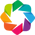

In [2]:
import holoviews as hv
from holoviews import opts
%matplotlib inline
import xarray as xr
hv.extension('bokeh')

In [2]:
latent_dim = 1024
save_step = 75000
_batch_size = 1
img_size = 256

basename = "256_1024_HA_GAN_Brain_GSP"

In [3]:
class Image:
    def __init__(self, image_array):
        self.image_array=image_array
        self.xr=None
    def get_xr(self):
        if self.xr is not None:
            return self.xr
        else:
            self.xr=xr.Dataset({'image': (['x','y','z'], self.image_array)},
                      coords={
                          'x':np.arange(img_size),
                          'y':np.arange(img_size),
                          'z':np.arange(img_size)
                      })
            return self.xr
        
def plot_on_grid(image):
    hv_image = hv.Dataset(image.get_xr())
    layout = (hv_image.to(hv.Image, ['y', 'x'], groupby=['z'], dynamic=True).opts(tools=['hover'])
              + hv_image.to(hv.Image, ['z', 'x'], groupby=['y'], dynamic=True).opts(tools=['hover'])
              + hv_image.to(hv.Image, ['z', 'y'], groupby=['x'], dynamic=True).opts(tools=['hover']))

    layout.opts(
        opts.Image(width=300, height=300, cmap="gray"))
    return layout

def plot_pair(image1, image2):
    hv_image1 = hv.Dataset(image1.get_xr())
    hv_image2 = hv.Dataset(image2.get_xr())
    
    layout = (hv_image1.to(hv.Image, ['z', 'y'], groupby=['x'], label="Real", dynamic=True).opts(tools=['hover'])
              + hv_image2.to(hv.Image, ['z', 'y'], groupby=['x'], label="Reconstruction", dynamic=True).opts(tools=['hover']))
    
    layout.opts(
        opts.Image(width=300, height=300, cmap="gray"))
    return layout

def plot_pair_coronal(image1, image2):
    hv_image1 = hv.Dataset(image1.get_xr())
    hv_image2 = hv.Dataset(image2.get_xr())
    
    layout = (hv_image1.to(hv.Image, ['z', 'x'], groupby=['y'], label="Real", dynamic=True).opts(tools=['hover'])
              + hv_image2.to(hv.Image, ['z', 'x'], groupby=['y'], label="Reconstruction", dynamic=True).opts(tools=['hover']))
    
    layout.opts(
        opts.Image(width=300, height=300, cmap="bone"))
    return layout

def post_process_brain(x_pred):
    x_pred = resize(x_pred, (256-100,256-60,256-60), mode='constant', cval=0.)
    x_canvas = np.zeros((256,256,256))
    x_canvas[50:-50,30:-30,30:-30] = x_pred
    x_canvas = np.flip(x_canvas,0)
    return x_canvas

def post_process_brain_GSP(x_pred):
    x_pred = resize(x_pred, (256-106,256-40,256-40), mode='constant', cval=0.)
    x_canvas = np.zeros((256,256,256))
    x_canvas[43:-63,20:-20,20:-20] = x_pred
    x_canvas = np.flip(x_canvas,0)
    return x_canvas

In [4]:
trainset = Brain_dataset(img_size=img_size, stage="eval")#, tesla=3)
train_loader = torch.utils.data.DataLoader(trainset,batch_size=_batch_size,drop_last=True,
                                              shuffle=False,num_workers=4)
dataloader_iterator = iter(train_loader)

Dataset size: 500


In [5]:
G = Generator(noise=latent_dim, mode="eval")
E = Encoder()
Sub_E = Sub_Encoder(n_class=latent_dim)

ckpt_path = "./checkpoint/"+basename+"/G_iter"+str(save_step)+".pth"
ckpt = torch.load(ckpt_path)
ckpt = trim_state_dict_name(ckpt)
G.load_state_dict(ckpt)

ckpt_path = "./checkpoint/"+basename+"/E_iter"+str(save_step)+".pth"
ckpt = torch.load(ckpt_path)
ckpt = trim_state_dict_name(ckpt)
E.load_state_dict(ckpt)

ckpt_path = "./checkpoint/"+basename+"/Sub_E_iter"+str(save_step)+".pth"
ckpt = torch.load(ckpt_path)
ckpt = trim_state_dict_name(ckpt)
Sub_E.load_state_dict(ckpt)

print(save_step, "step weights loaded.")
del ckpt

G = G.cuda()
E = E.cuda()
Sub_E = Sub_E.cuda()

G.eval()
E.eval()
Sub_E.eval()

torch.cuda.empty_cache()

75000 step weights loaded.


## Random generation

In [41]:
with torch.no_grad():
    z_rand = Variable(torch.randn((_batch_size, latent_dim))).cuda()
    x_rand = G(z_rand,0) # dumb index 0, not used
    x_rand = x_rand.detach().cpu().numpy()
    x_rand = 0.5*x_rand+0.5 # rescale
    
x_rand = post_process_brain_GSP(x_rand[0,0,:,:,:])

In [22]:
x_rand_img = Image(x_rand)
plot_on_grid(x_rand_img)

:Layout
   .DynamicMap.I   :DynamicMap   [z]
      :Image   [y,x]   (image)
   .DynamicMap.II  :DynamicMap   [y]
      :Image   [z,x]   (image)
   .DynamicMap.III :DynamicMap   [x]
      :Image   [z,y]   (image)

### Slices

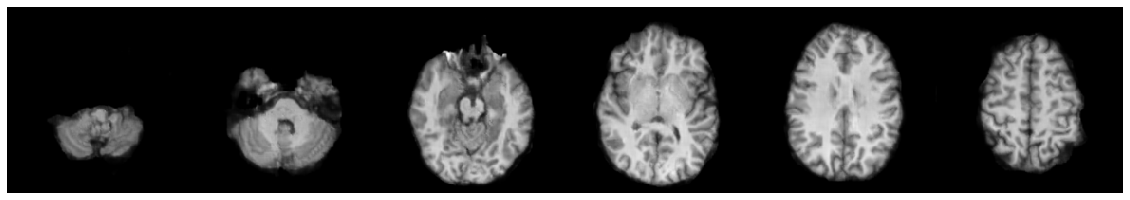

In [18]:
result = []
for i in range(82,187,20):
    result.append(np.flip(x_rand[i,:,:],0)[30:-30,30:-30])
    
result = np.concatenate(result, 1)
plt.figure(figsize=(20,60))
plt.imshow(result, cmap="gray")
plt.axis('off')

#plt.savefig("results/figures/x_rand_1_brain.png")
plt.show()

### Different views

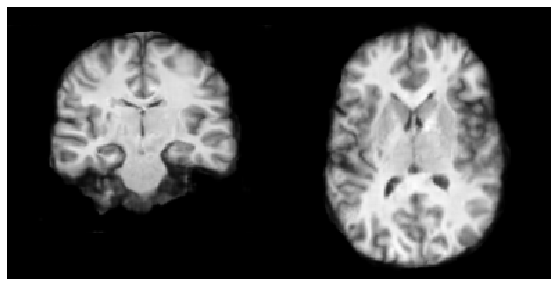

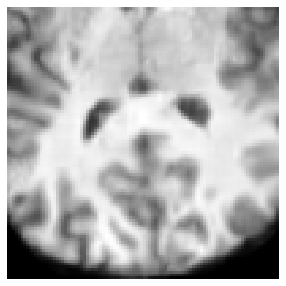

In [42]:
#ratio = (256-90)/(256-40.)

slice_idx = [145,120,101]
slice_x = np.flip(x_rand[slice_idx[0],:,:])
#slice_y = np.zeros((256,256))
slice_y = np.flip(x_rand[:,slice_idx[1],:].copy())
#insertion = resize(insertion, (int(256*ratio),256), mode='constant', cval=0.)
#slice_y[128-int(256*ratio//2):128+int(256*ratio//2),:] = insertion
#slice_x = np.flip(x_rand[slice_idx[0],:,:],0)
slice_z = np.flip(x_rand[:,:,slice_idx[2]],0)

#result = np.concatenate([slice_x,slice_y,slice_z],1)
result = np.concatenate([slice_y[30:-30, 30:-30],slice_x[30:-30, 30:-30]],1)
plt.figure(figsize=(10,5))
plt.imshow(result, cmap="gray")
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(slice_x[128-10:128+90,128-50:128+50], cmap="gray")
plt.axis('off')
plt.show()

### Interpolation

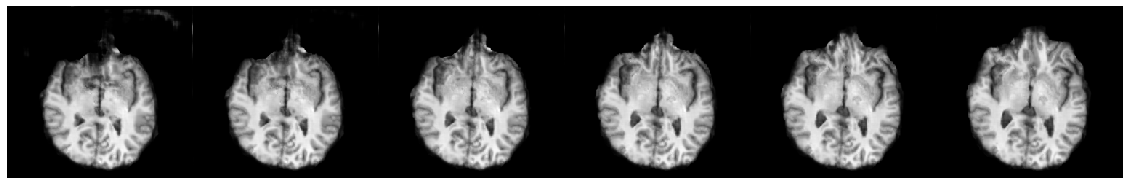

In [35]:
z_rand_start = np.random.normal(size=(_batch_size, latent_dim))
z_rand_end = np.random.normal(size=(_batch_size, latent_dim))
result = []

for i in range(0,12,2):
    alpha = i / 10.
    z_rand = alpha*z_rand_start + (1-alpha)*z_rand_end
    z_rand = torch.from_numpy(z_rand).float().cuda()
    with torch.no_grad():
        x_rand = G(z_rand,0) # dumb index 0, not used
    x_rand = x_rand.detach().cpu().numpy()
    x_rand = 0.5*x_rand+0.5 # rescale

    result.append(np.flip(x_rand[0,0,128,:,:],0)[10:-10,:])

result = np.concatenate(result, 1)
plt.figure(figsize=(20,60))
plt.imshow(result, cmap="gray")
plt.axis('off')
plt.show()

## Image reconstruction

In [12]:
x_real = next(dataloader_iterator)
real_image = 0.5*x_real.numpy()+0.5
real_image = post_process_brain_GSP(real_image[0,0,:,:,:])

print(real_image.mean())

0.05289641587725901


In [57]:
real_image_img = Image(real_image)
plot_on_grid(real_image_img)

:Layout
   .DynamicMap.I   :DynamicMap   [z]
      :Image   [y,x]   (image)
   .DynamicMap.II  :DynamicMap   [y]
      :Image   [z,x]   (image)
   .DynamicMap.III :DynamicMap   [x]
      :Image   [z,y]   (image)

In [13]:
with torch.no_grad():
    x_real = x_real.float().cuda()
    z_hat = E(x_real)
    sub_z_hat = Sub_E(z_hat)
    x_hat = G(sub_z_hat,0)
x_hat = x_hat.detach().cpu().numpy()
x_hat = 0.5*x_hat+0.5
#x_hat = x_hat[0,0,:,:,:]
x_hat = post_process_brain_GSP(x_hat[0,0,:,:,:])

In [59]:
x_hat_img = Image(x_hat)
plot_pair(real_image_img, x_hat_img)

:Layout
   .DynamicMap.I  :DynamicMap   [x]
      :Image   [z,y]   (image)
   .DynamicMap.II :DynamicMap   [x]
      :Image   [z,y]   (image)

### Results
The first two images are real images, the last two are reconstruction results

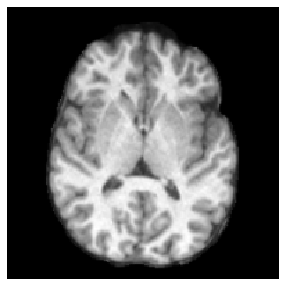

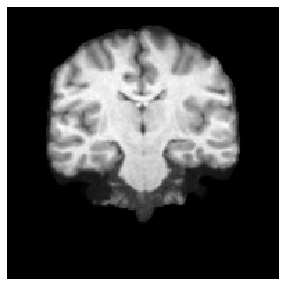

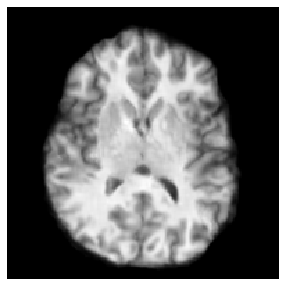

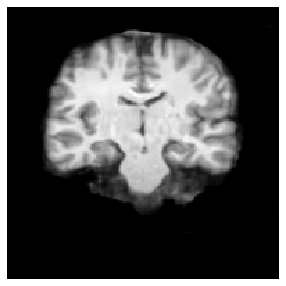

In [14]:
slice_idx = [145,120,101]
real_image_slice_x = np.flip(real_image[slice_idx[0],:,:],0)[30:-30, 30:-30]
real_image_slice_y = np.flip(real_image[:,slice_idx[1],:],0)[30:-30, 30:-30]
x_hat_slice_x = np.flip(x_hat[slice_idx[0],:,:],0)[30:-30, 30:-30]
x_hat_slice_y = np.flip(x_hat[:,slice_idx[1],:],0)[30:-30, 30:-30]

plt.figure(figsize=(5,5))
plt.imshow(real_image_slice_x, cmap="gray")
plt.axis('off')
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(real_image_slice_y, cmap="gray")
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(x_hat_slice_x, cmap="gray")
plt.axis('off')
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(x_hat_slice_y, cmap="gray")
plt.axis('off')
plt.show()